# TP 4 - Procesamiento de Imagenes
Grupo 4 <br>
Integrantes:
- Pablo Smolkin
- Pedro Carranza Vélez
- Philippe Dutriez Diaz
- Francisco Daniel Ledesma

Nota: Las funciones utilizadas se encuentran en el archivo functions.py

In [31]:
from sys import path
from os.path import realpath
path.append(realpath("../")) # Makes it works everywhere
from common.functions import *

In [32]:
from functions import *

In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


***
### 1. Dada la imagen *lena_gray.tif* se pide obtener:

* El negativo de la imagen.
* Una transformación tal que convierta los valores entre [0.25 0.5] al rango [0 1].

(Usar imadjust de Matlab pero implementarlo en Python)

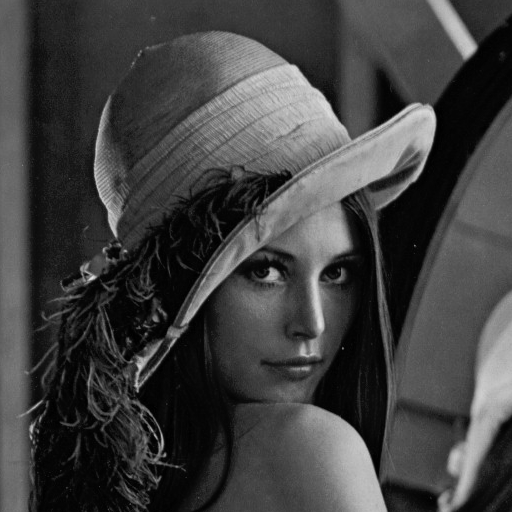

In [34]:
lena = Image.open('img/lena_gray.tif')
w, h = lena.size
displayImage(lena, w, h)

Negativo

$s = L - 1 - r$

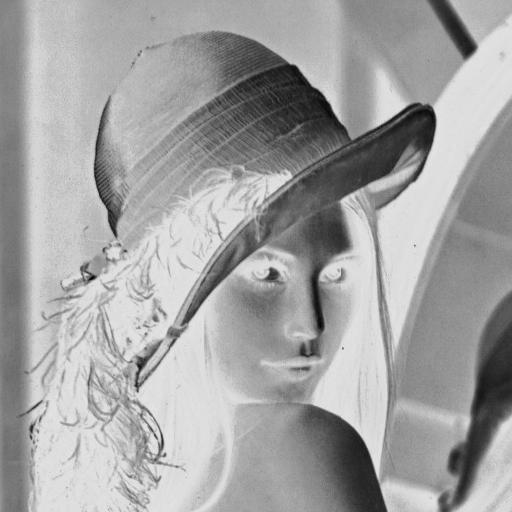

In [35]:
lena_arr = np.asarray(lena)
L = np.max(lena_arr) + 1    # Niveles de grises en la imagen
lena_neg = L - 1 - lena_arr     # Ecuación del negativo
displayImage(Image.fromarray(lena_neg), w, h)

[0.25 0.5] $\rightarrow$ [0 1]

La imagen original tiene valores desde 0 hasta $L-1$.

Se dividen todos los valores por $L-1$ tal que el máximo es $1.0$.

Todos los valores < 0.25 $\rightarrow$ 0.0

Todos los valores > 0.5 $\rightarrow$ 1.0

Se multiplican todos los valores por $L-1$ para volver a la escala original.

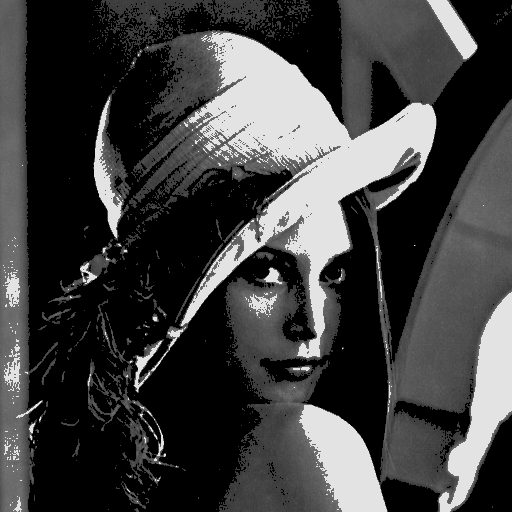

In [36]:
lena_float = np.asarray(lena, dtype=float)/(L-1)
lena_scaled = imadjust(lena_float, 0.25, 0.5, 0, 1)
lena_scaled = lena_scaled*(L-1)
lena_scaled = lena_scaled.astype(np.uint8)
displayImage(Image.fromarray(lena_scaled), w, h)

***
### 2. Dada la imagen del globo ocular *eyebw.jpg*, buscar transformaciones que permitan resaltar las venas lo mejor posible.

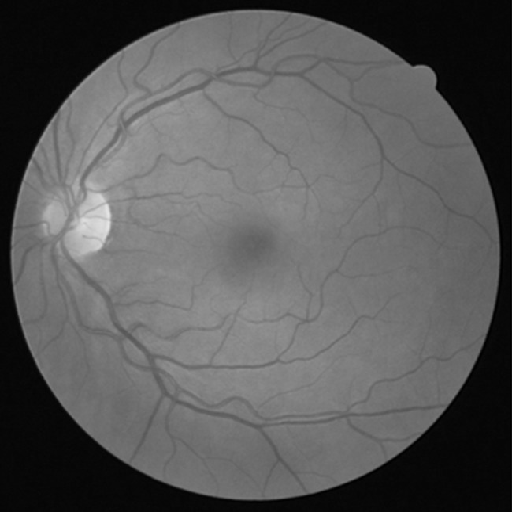

In [37]:
eyebw = Image.open('img/eyebw.jpg')
w, h = lena.size
displayImage(eyebw, w, h)

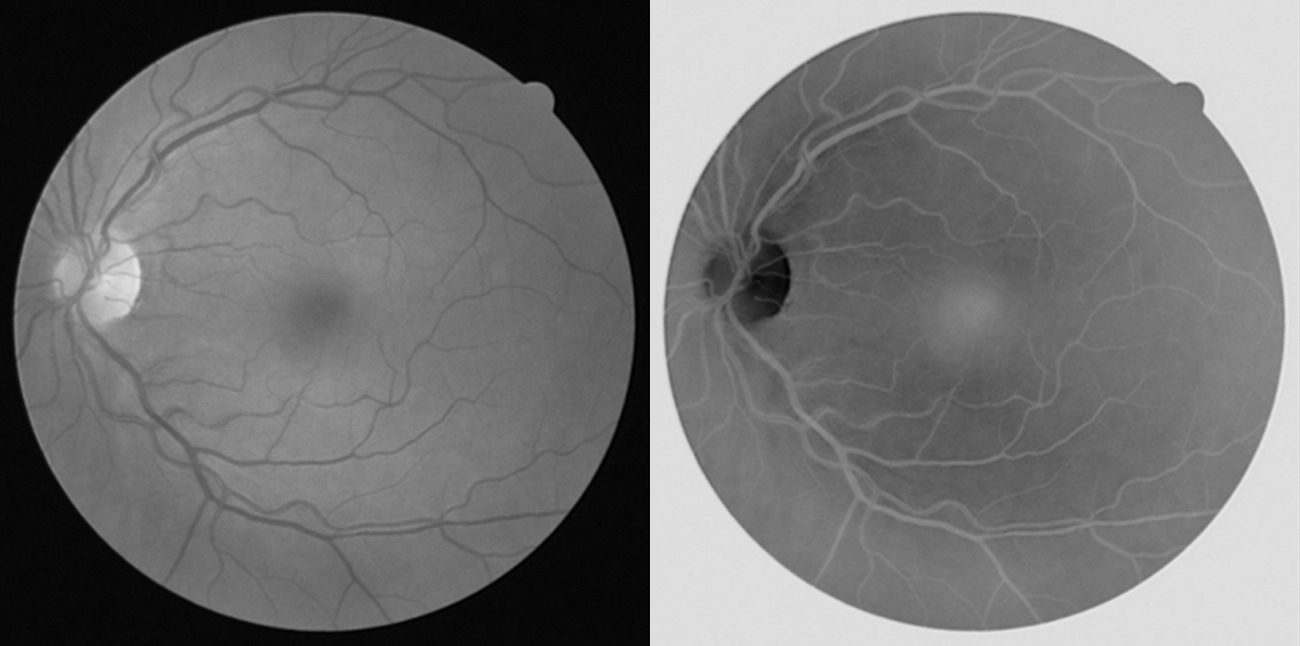

In [38]:
eyebw_arr = np.asarray(eyebw)
L = np.max(eyebw_arr) + 1    # Niveles de grises en la imagen
eyebw_neg = L - 1 - eyebw_arr     # Ecuación del negativo

normal_negative = np.concatenate((eyebw_arr, eyebw_neg), axis=1)
disp_img = Image.fromarray(normal_negative)
w, h = disp_img.size
displayImage(disp_img, w, h)

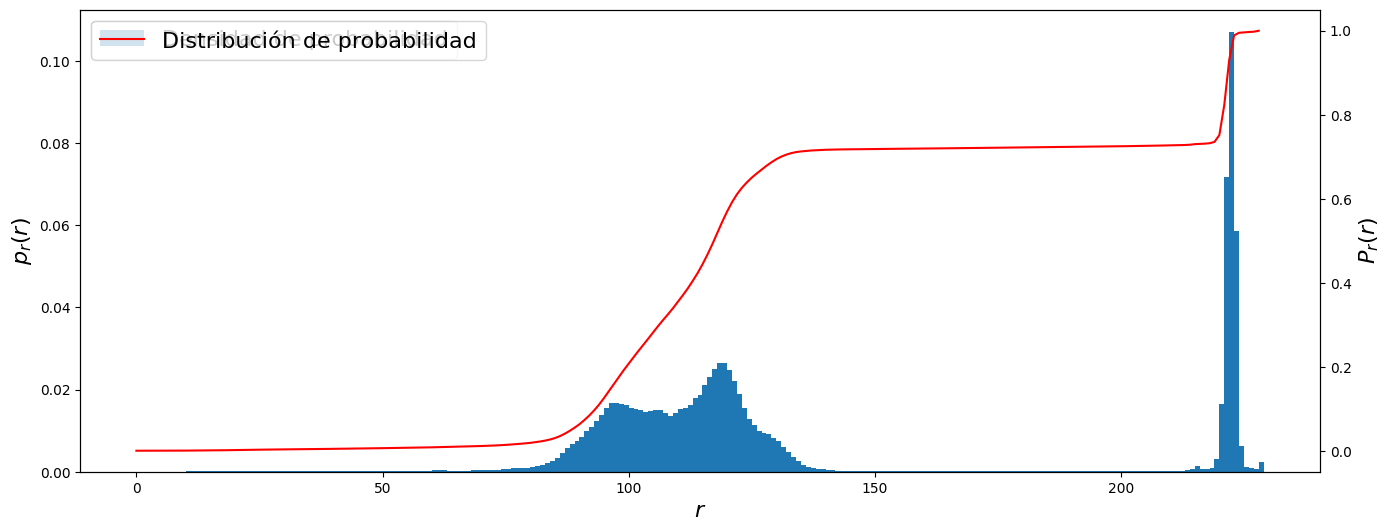

In [39]:
# eyebw_pdf, eyebw_cdf = calc_prob(eyebw_arr,plot=True,figsize=(16,6))
eyebw_neg_pdf, eyebw_neg_cdf = calc_prob(eyebw_neg,plot=True,figsize=(16,6))

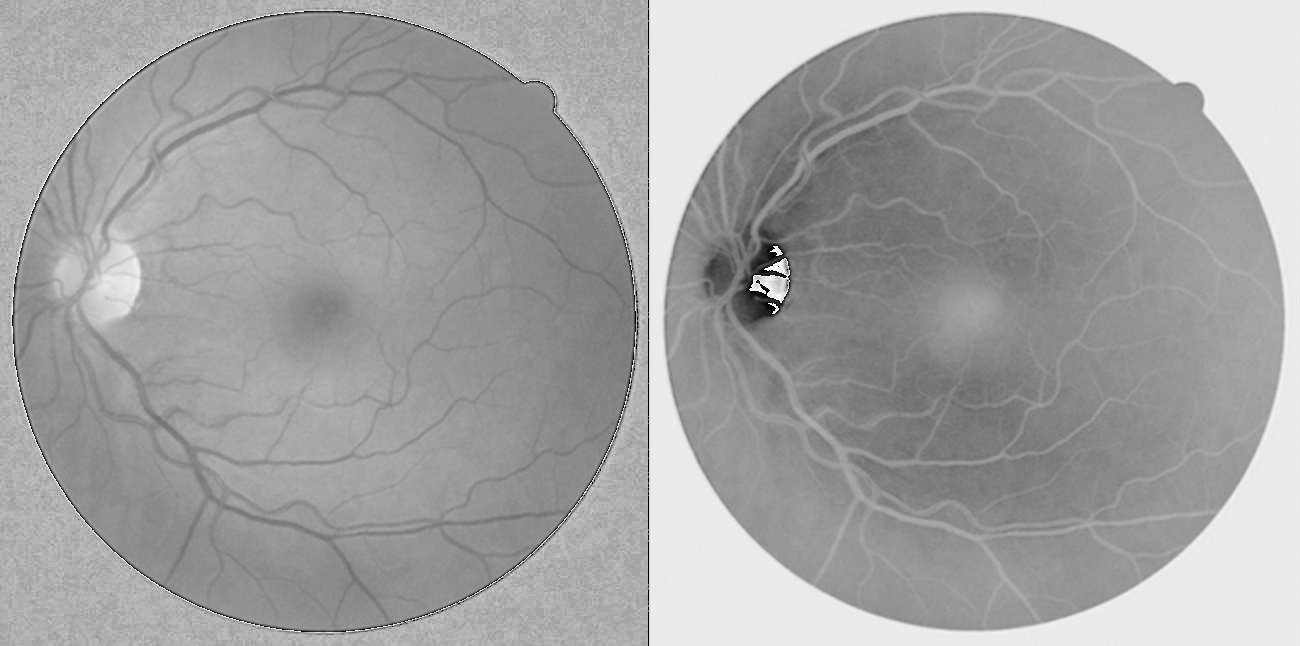

In [40]:
eyebw_exp_arr = apply_transformation(lambda r: exponential_logaritmic(512, 0.3, 255, r), eyebw_arr)
eyebw_exp_neg = apply_transformation(lambda r: exponential_logaritmic(512, 0.3, 255, r), eyebw_neg)

normal_negative = np.concatenate((eyebw_exp_arr, eyebw_exp_neg), axis=1)
disp_img = Image.fromarray(normal_negative)
w, h = disp_img.size
displayImage(disp_img, w, h)


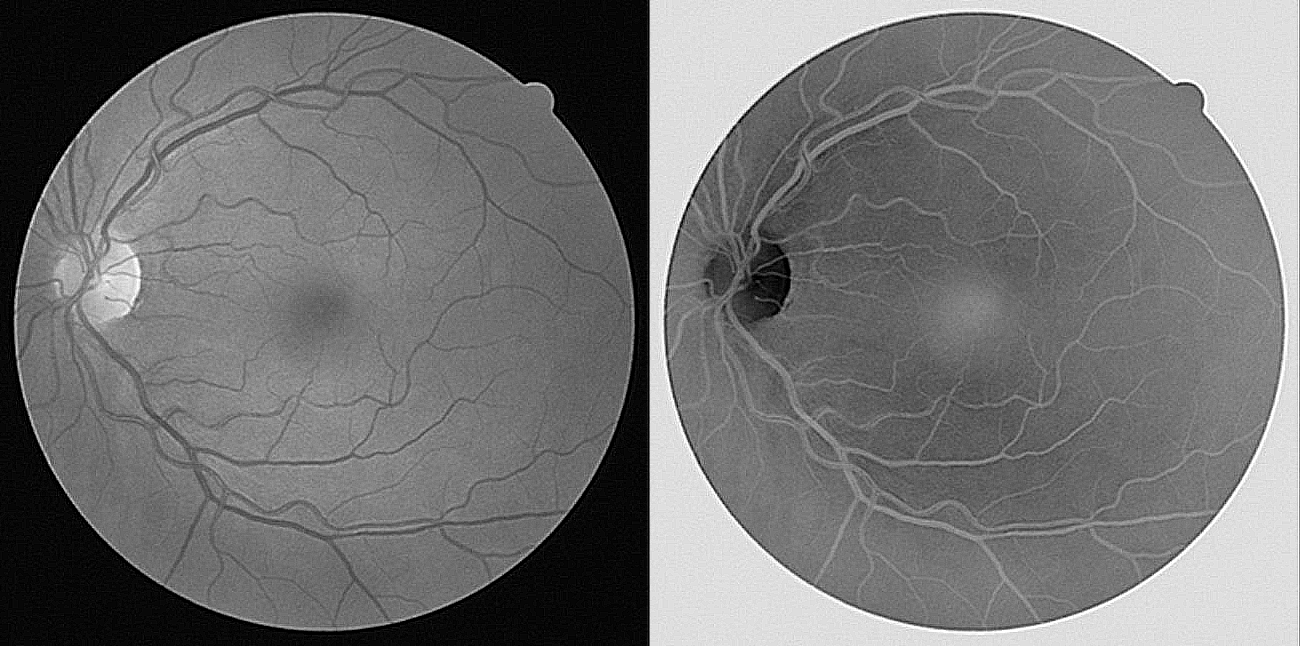

In [41]:
kernel = -np.ones((3, 3))
kernel[1,1] = 9.0
eyebw_boost_arr = filter2D(src=eyebw_arr, ddepth=-1, kernel=kernel)
eyebw_boost_neg = filter2D(src=eyebw_neg, ddepth=-1, kernel=kernel)

# displayImage_fromcv2(eyebw_exp_boost, w, h)

normal_negative = np.concatenate((eyebw_boost_arr, eyebw_boost_neg), axis=1)
disp_img = Image.fromarray(normal_negative)
w, h = disp_img.size
displayImage(disp_img, w, h)

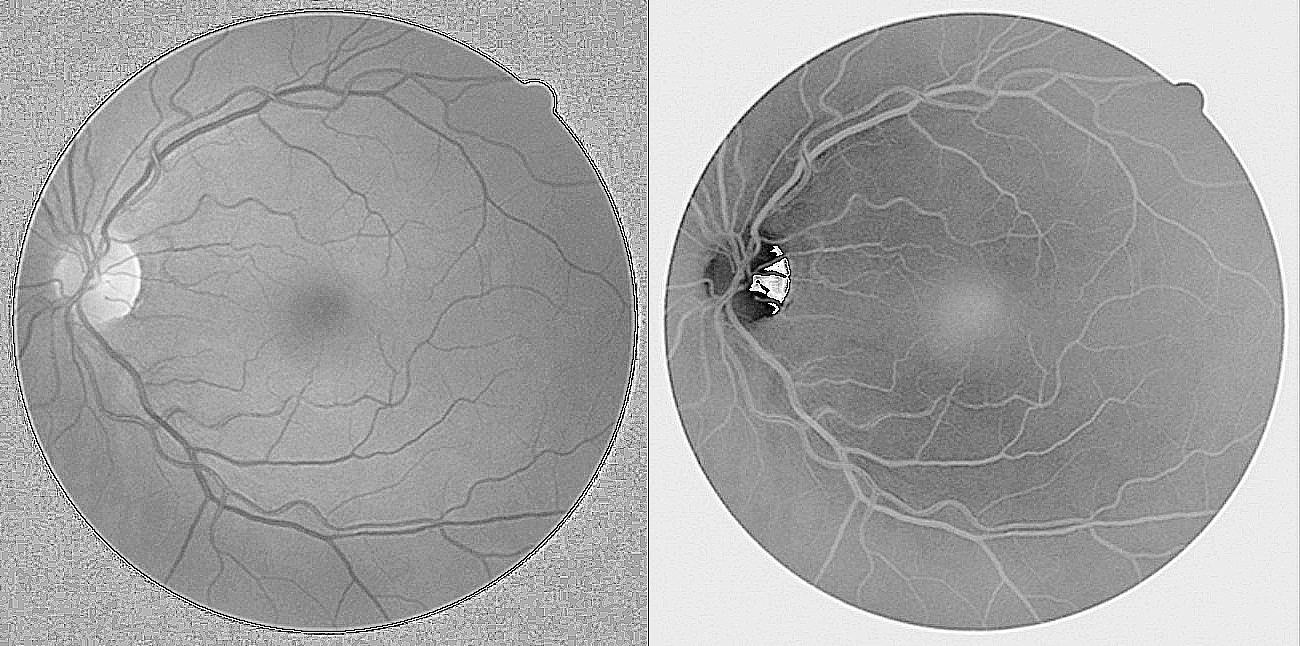

In [42]:
kernel = -np.ones((3, 3))
kernel[1,1] = 9.0
eyebw_boost_exp_arr = filter2D(src=eyebw_exp_arr, ddepth=-1, kernel=kernel)
eyebw_boost_exp_neg = filter2D(src=eyebw_exp_neg, ddepth=-1, kernel=kernel)

normal_negative = np.concatenate((eyebw_boost_exp_arr, eyebw_boost_exp_neg), axis=1)
disp_img = Image.fromarray(normal_negative)
w, h = disp_img.size
displayImage(disp_img, w, h)

Primera fila es original y segunda fila es negada:
	 Original 				 Exponencial 				 High Boost 			 Exponencial con High Boost


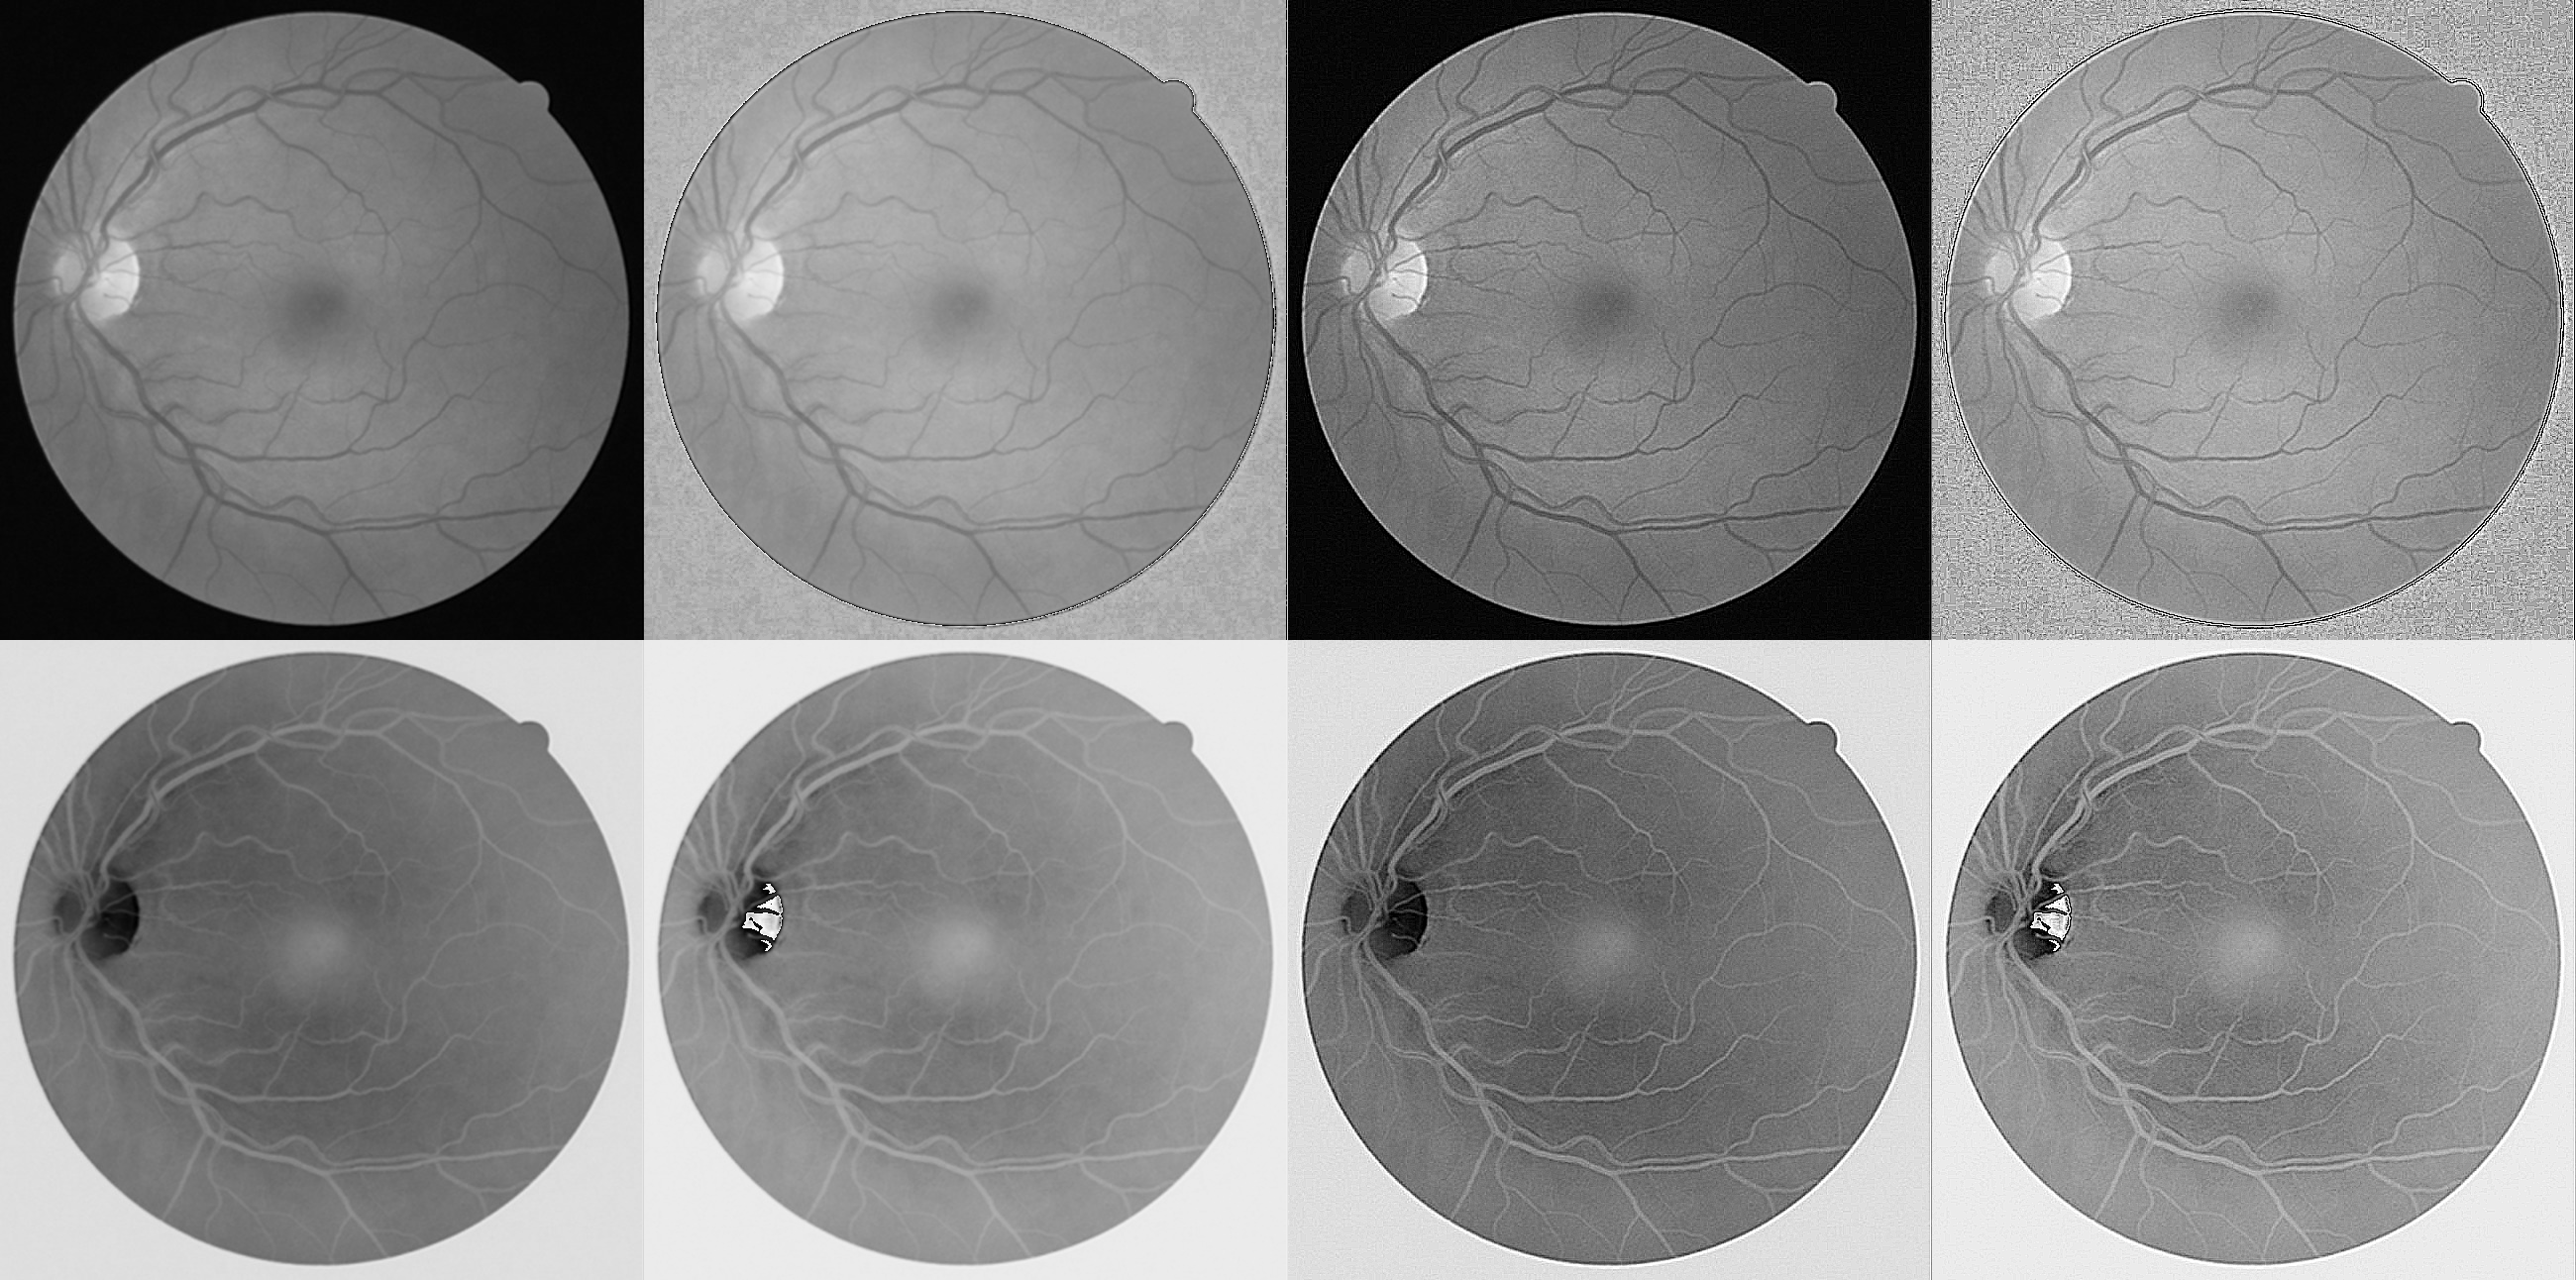

In [43]:
fig1 = np.concatenate((eyebw_arr, eyebw_neg), axis=0)
fig2 = np.concatenate((eyebw_exp_arr, eyebw_exp_neg), axis=0)
fig3 = np.concatenate((eyebw_boost_arr, eyebw_boost_neg), axis=0)
fig4 = np.concatenate((eyebw_boost_exp_arr, eyebw_boost_exp_neg), axis=0)
fig_comparison = np.concatenate((fig1,fig2,fig3,fig4),axis=1)

comp_img = Image.fromarray(fig_comparison)
w, h = comp_img.size
print("Primera fila es original y segunda fila es negada:")
print("\t Original \t\t\t\t Exponencial \t\t\t\t High Boost \t\t\t Exponencial con High Boost")
displayImage(comp_img, w, h)

***
### 3. Bit Plane Slicing
* Reproducir el ejemplo de la teoría del fractal 8 bit.

In [44]:
import numpy as np

def bitslice(img, bit):

    mask = (1 << bit) * np.ones(np.shape(img), dtype='uint8')

    sliced_img = np.bitwise_and(mask, img)

    # Normalize to the [0,255] range
    sliced_img = np.uint8((sliced_img - sliced_img.min()) / (sliced_img.max() - sliced_img.min()) * 255)

    return sliced_img

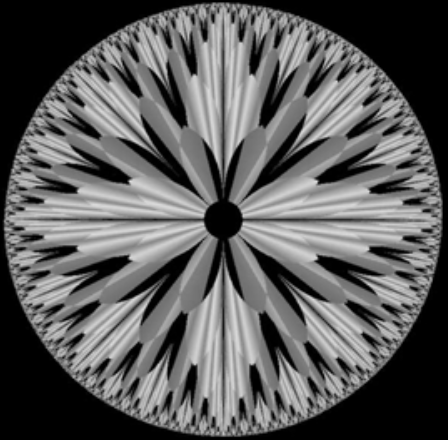

In [45]:
fractal = Image.open('img/fractal.png')
w, h = fractal.size
displayImage(fractal, w, h)

In [46]:
slice_1 = bitslice(fractal, 0)
slice_2 = bitslice(fractal, 1)
slice_3 = bitslice(fractal, 2)
slice_4 = bitslice(fractal, 3)
slice_5 = bitslice(fractal, 4)
slice_6 = bitslice(fractal, 5)
slice_7 = bitslice(fractal, 6)
slice_8 = bitslice(fractal, 7)

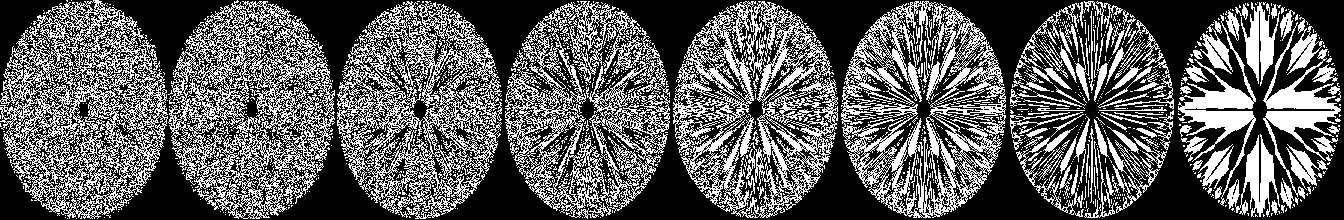

In [47]:
slices = np.concatenate((slice_1, slice_2, slice_3, slice_4, slice_5, slice_6, slice_7, slice_8), axis=1)
displayImage(Image.fromarray(slices), w*3, h//2)

* Dada la imagen *onedollar.jpg*, convertirla a niveles de gris y mostrar todos los bit-planes (8 bit). A partir de los bit-planes obtenidos, reconstruir la imagen usando diferentes bit-planes (Experimentar usando los planos 8-7-6-5-1).

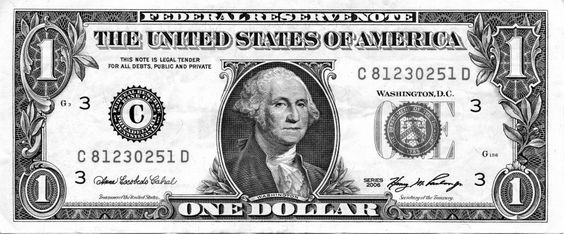

In [48]:
onedollar_bw = Image.open('img/onedollar.jpg').convert('L')
w, h = onedollar_bw.size
displayImage(onedollar_bw, w, h)

In [49]:
dollar_slice_1 = bitslice(onedollar_bw, 0)
dollar_slice_2 = bitslice(onedollar_bw, 1)
dollar_slice_3 = bitslice(onedollar_bw, 2)
dollar_slice_4 = bitslice(onedollar_bw, 3)
dollar_slice_5 = bitslice(onedollar_bw, 4)
dollar_slice_6 = bitslice(onedollar_bw, 5)
dollar_slice_7 = bitslice(onedollar_bw, 6)
dollar_slice_8 = bitslice(onedollar_bw, 7)

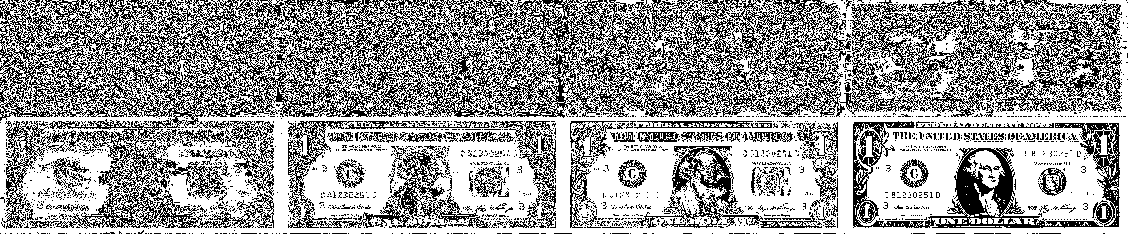

In [50]:
slices_1_4 = np.concatenate((dollar_slice_1, dollar_slice_2, dollar_slice_3, dollar_slice_4), axis=1)
slices_5_8 = np.concatenate((dollar_slice_5, dollar_slice_6, dollar_slice_7, dollar_slice_8), axis=1)
dollar_all_slices = np.concatenate((slices_1_4, slices_5_8), axis=0)
displayImage(Image.fromarray(dollar_all_slices), w*2, h)

In [51]:
def reconstruct_from_slices(slices, shape, slice1=None, slice2=None, slice3=None, slice4=None, slice5=None, slice6=None, slice7=None, slice8=None):
    
    one = np.ones(shape, dtype='uint8')

    all_slices = np.zeros((8, shape[0], shape[1]), dtype='uint8')

    if slice1 is not None:
        slice1_bit = np.bitwise_and(slice1, one)
        slice1_bit = np.left_shift(slice1_bit, 0)
        all_slices[:][:][0] = slice1_bit
    if slice2 is not None:
        slice2_bit = np.bitwise_and(slice2, one)
        slice2_bit = np.left_shift(slice2_bit, 1)
        all_slices[:][:][1] = slice2_bit
    if slice3 is not None:
        slice3_bit = np.bitwise_and(slice3, one)
        slice3_bit = np.left_shift(slice3_bit, 2)
        all_slices[:][:][2] = slice3_bit
    if slice4 is not None:
        slice4_bit = np.bitwise_and(slice4, one)
        slice4_bit = np.left_shift(slice4_bit, 3)
        all_slices[:][:][3] = slice4_bit
    if slice5 is not None:
        slice5_bit = np.bitwise_and(slice5, one)
        slice5_bit = np.left_shift(slice5_bit, 4)
        all_slices[:][:][4] = slice5_bit
    if slice6 is not None:
        slice6_bit = np.bitwise_and(slice6, one)
        slice6_bit = np.left_shift(slice6_bit, 5)
        all_slices[:][:][5] = slice6_bit
    if slice7 is not None:
        slice7_bit = np.bitwise_and(slice7, one)
        slice7_bit = np.left_shift(slice7_bit, 6)
        all_slices[:][:][6] = slice7_bit
    if slice8 is not None:
        slice8_bit = np.bitwise_and(slice8, one)
        slice8_bit = np.left_shift(slice8_bit, 7)
        all_slices[:][:][7] = slice8_bit

    reconstruction = np.zeros(shape, dtype='uint8')
    for i in range(len(slices)):
        reconstruction = np.bitwise_or(reconstruction, all_slices[:][:][slices[i]])

    # Normalize to the [0,255] range
    reconstruction = np.uint8((reconstruction - reconstruction.min()) / (reconstruction.max() - reconstruction.min()) * 255)

    return reconstruction

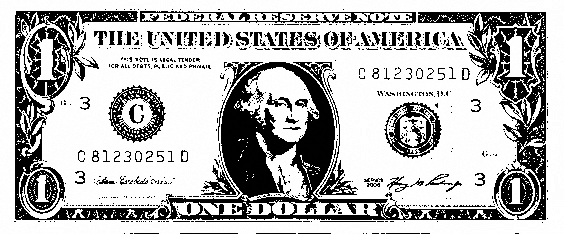

In [52]:
reconstruction_1_8 = reconstruct_from_slices((0,7), np.shape(dollar_slice_1), slice1=dollar_slice_1, slice8=dollar_slice_8)
displayImage(Image.fromarray(reconstruction_1_8), w, h)

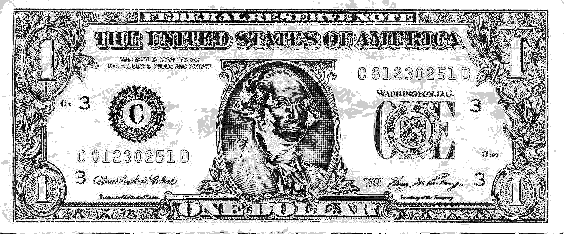

In [53]:
reconstruction_5_7 = reconstruct_from_slices((4,6), np.shape(dollar_slice_5), 
                                                    slice5=dollar_slice_5, slice7=dollar_slice_7)
displayImage(Image.fromarray(reconstruction_5_7), w, h)

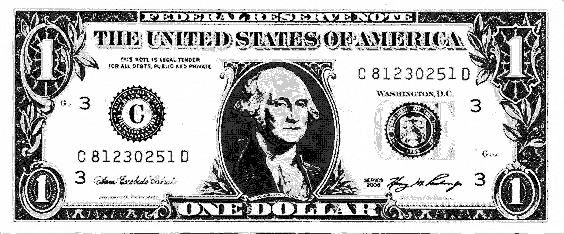

In [54]:
reconstruction_1_5_8 = reconstruct_from_slices((0,5,7), np.shape(dollar_slice_1), 
                                                    slice1=dollar_slice_1, slice6=dollar_slice_6, 
                                                    slice8=dollar_slice_8)
displayImage(Image.fromarray(reconstruction_1_5_8), w, h)

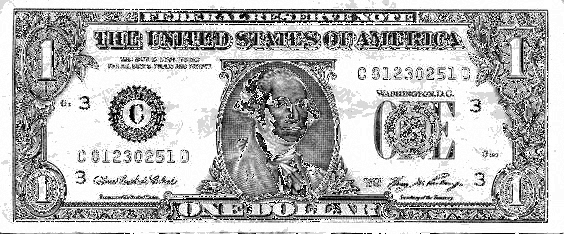

In [55]:
reconstruction_1_5_6_7 = reconstruct_from_slices((0,4,5,6), np.shape(dollar_slice_1), 
                                                    slice1=dollar_slice_1, slice5=dollar_slice_5, 
                                                    slice6=dollar_slice_6, slice7=dollar_slice_7)
displayImage(Image.fromarray(reconstruction_1_5_6_7), w, h)

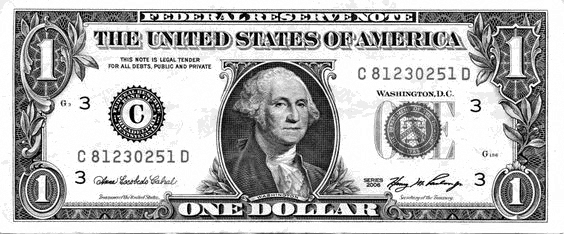

In [56]:
reconstruction_1_5_6_7_8 = reconstruct_from_slices((0,4,5,6,7), np.shape(dollar_slice_1), 
                                                    slice1=dollar_slice_1, slice5=dollar_slice_5, 
                                                    slice6=dollar_slice_6, slice7=dollar_slice_7,
                                                    slice8=dollar_slice_8)
displayImage(Image.fromarray(reconstruction_1_5_6_7_8), w, h)

***
### 4. Explicar que es un histograma de una imagen. Escribir un código para calcularlo.
El histograma es una transformación que puede ser aplicada a una imágen, que muestra las características estadísticas de la misma. Que se describe como:
\begin{equation}
h(r_k) = n_k
\end{equation}

Donde $r_k$ es un nivel dentro del rango de $L$ niveles de la imágen, y $n_k$ es la cantidad de puntos de la imagen que poseen ese nivel. En el caso de una imagen en escala de grises, puede pensarse como la cantidad de pixeles de la imágen que tiene dicho tono de gris. Es importante remarcar que esta transformación no es reverisble, ya que distintas imágenes pueden tener el mismo histograma. 

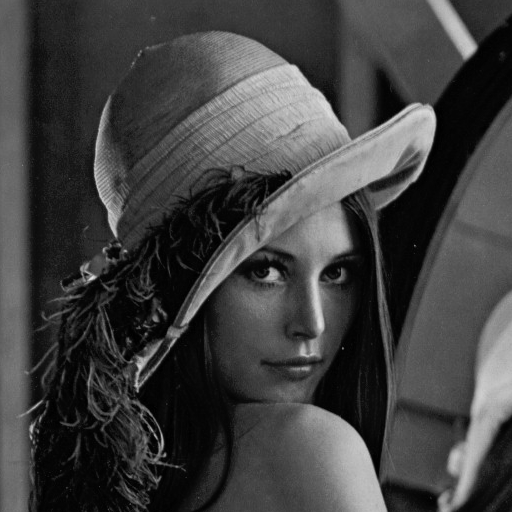

In [47]:
lena = Image.open('img/lena_gray.tif')
w, h = lena.size
displayImage(lena, w, h)

La imágen tiene muchas zonas oscuras, y pocas blancas o brillantes, por lo tanto su histograma va a contar con una mayor densidad de valores en su parte baja, como puede verse en el siguiente gráfico.

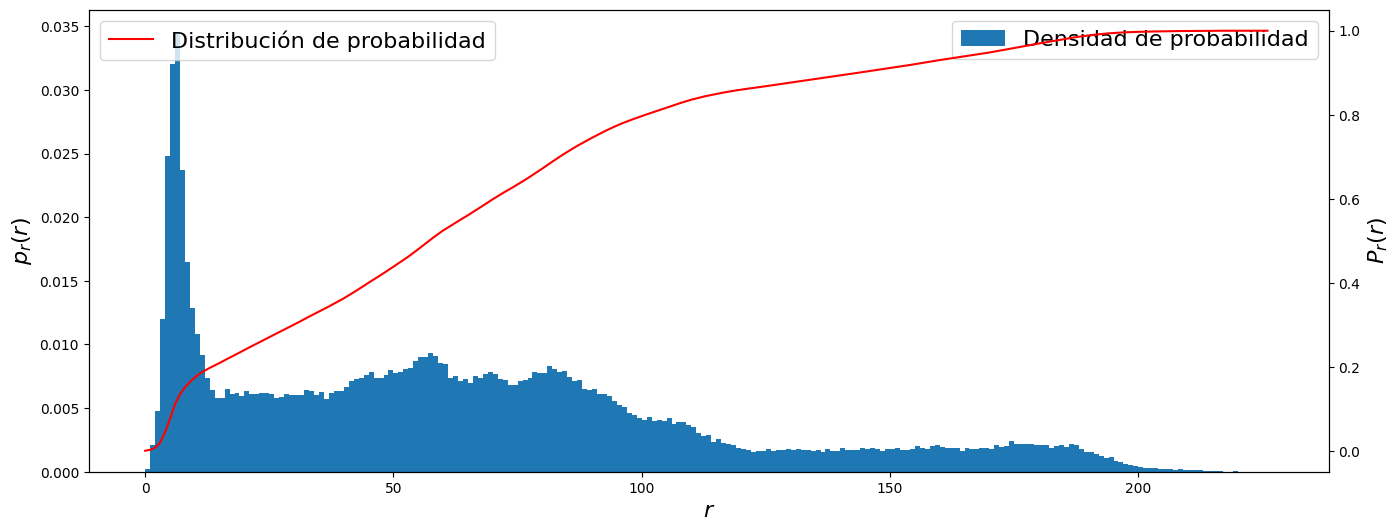

In [48]:
lena_pdf, lena_cdf = calc_prob(np.asarray(lena),plot=True,figsize=(16,6))

***
### 5. Explicar qué diferencia hay entre el brillo y contraste. Mostrar ejemplos.

***
### 6. Escribir un código que modifique el brillo y contraste de una imagen.

***
### 7.  ¿Para qué se usa la ecualización de un histograma? Dar ejemplos.

***
### 8. High Dynamic Range (HDR) Imaging
Investigar que es HDR y aplicarlo a las imágenes *office_x.jpg* (x=1-6).

Tiempos de exposicion : [0.0333, 0.1000, 0.3333, 0.6250, 1.3000, 4.0000]

Leer https://www.learnopencv.com/high-dynamic-range-hdr-imaging-using-opencv-cpp-python/

Abrir las imagenes y alinearlas por medio de MTB

In [57]:
import cv2

image_filenames = ["img/HDR images/office_1.jpg", "img/HDR images/office_2.jpg", "img/HDR images/office_3.jpg",
                   "img/HDR images/office_4.jpg", "img/HDR images/office_5.jpg", "img/HDR images/office_6.jpg"]

images = []

for filename in image_filenames:
    images.append(cv2.imread(filename))

exposure_times = np.array([0.0333, 0.1000, 0.3333, 0.6250, 1.3000, 4.0000], dtype=np.float32)

alignMTB = cv2.createAlignMTB()
alignMTB.process(images, images)

Obtener el CRF (Camera Response Function) por el método de Debevec

In [58]:
calibrateDebevec = cv2.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(images, exposure_times)

Unir las imagenes en una imagen HDR

In [59]:
mergeDebevec = cv2.createMergeDebevec()
office_DebevecHDR = mergeDebevec.process(images, exposure_times, responseDebevec)

# Save HDR image
cv2.imwrite("office_DebevecHDR.hdr", office_DebevecHDR)

True

Drago Tone Mapping

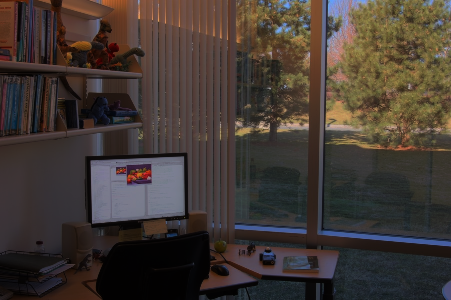

In [60]:
tonemapDrago = cv2.createTonemapDrago(1.0, 0.7)
office_Drago = tonemapDrago.process(office_DebevecHDR)
office_Drago = 3 * office_Drago  * 255

# LImitar entre [0,255]
office_Drago = np.uint8((office_Drago - office_Drago.min()) / (office_Drago.max() - office_Drago.min()) * 255)

# Guardar imagen
cv2.imwrite("office_Drago.jpg", office_Drago)

# Mostrar imagen
h, w, c = office_Drago.shape
displayImage_fromcv2(cv2.cvtColor(office_Drago, cv2.COLOR_BGR2RGB), w//2, h//2)

Reinhard Tone Mapping

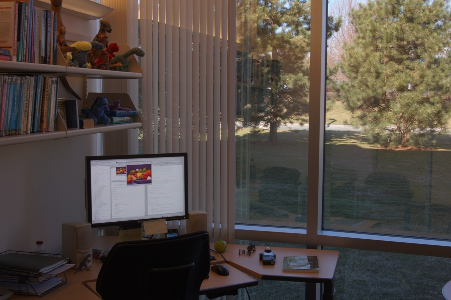

In [61]:
tonemapReinhard = cv2.createTonemapReinhard(1.5, 0,0,0)
office_Reinhard = tonemapReinhard.process(office_DebevecHDR)
office_Reinhard = 3 * office_Reinhard  * 255

# LImitar entre [0,255]
office_Reinhard = np.uint8((office_Reinhard - office_Reinhard.min()) / (office_Reinhard.max() - office_Reinhard.min()) * 255)

# Guardar imagen
cv2.imwrite("office_Reinhard.jpg", office_Reinhard)

# Mostrar imagen
h, w, c = office_Reinhard.shape
displayImage_fromcv2(cv2.cvtColor(office_Reinhard, cv2.COLOR_BGR2RGB), w//2, h//2)

Mantiuk Tone Mapping

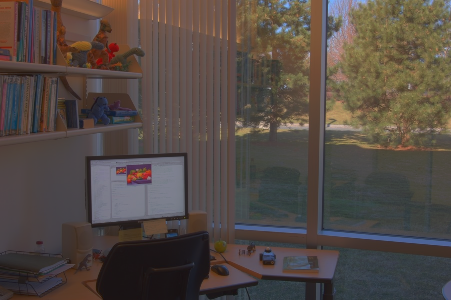

In [62]:
tonemapMantiuk = cv2.createTonemapMantiuk(2.2,0.85, 1.2)
office_Mantiuk = tonemapMantiuk.process(office_DebevecHDR)
office_Mantiuk = 3 * office_Mantiuk  * 255

# LImitar entre [0,255]
office_Mantiuk = np.uint8((office_Mantiuk - office_Mantiuk.min()) / (office_Mantiuk.max() - office_Mantiuk.min()) * 255)

# Guardar imagen
cv2.imwrite("office_Mantiuk.jpg", office_Mantiuk)

# Mostrar imagen
h, w, c = office_Mantiuk.shape
displayImage_fromcv2(cv2.cvtColor(office_Mantiuk, cv2.COLOR_BGR2RGB), w//2, h//2)

***
### 9. Realizar la medición de al menos 2 monitores (Laptop-PC) de la corrección gamma usando el fotómetro provisto por la catedra.

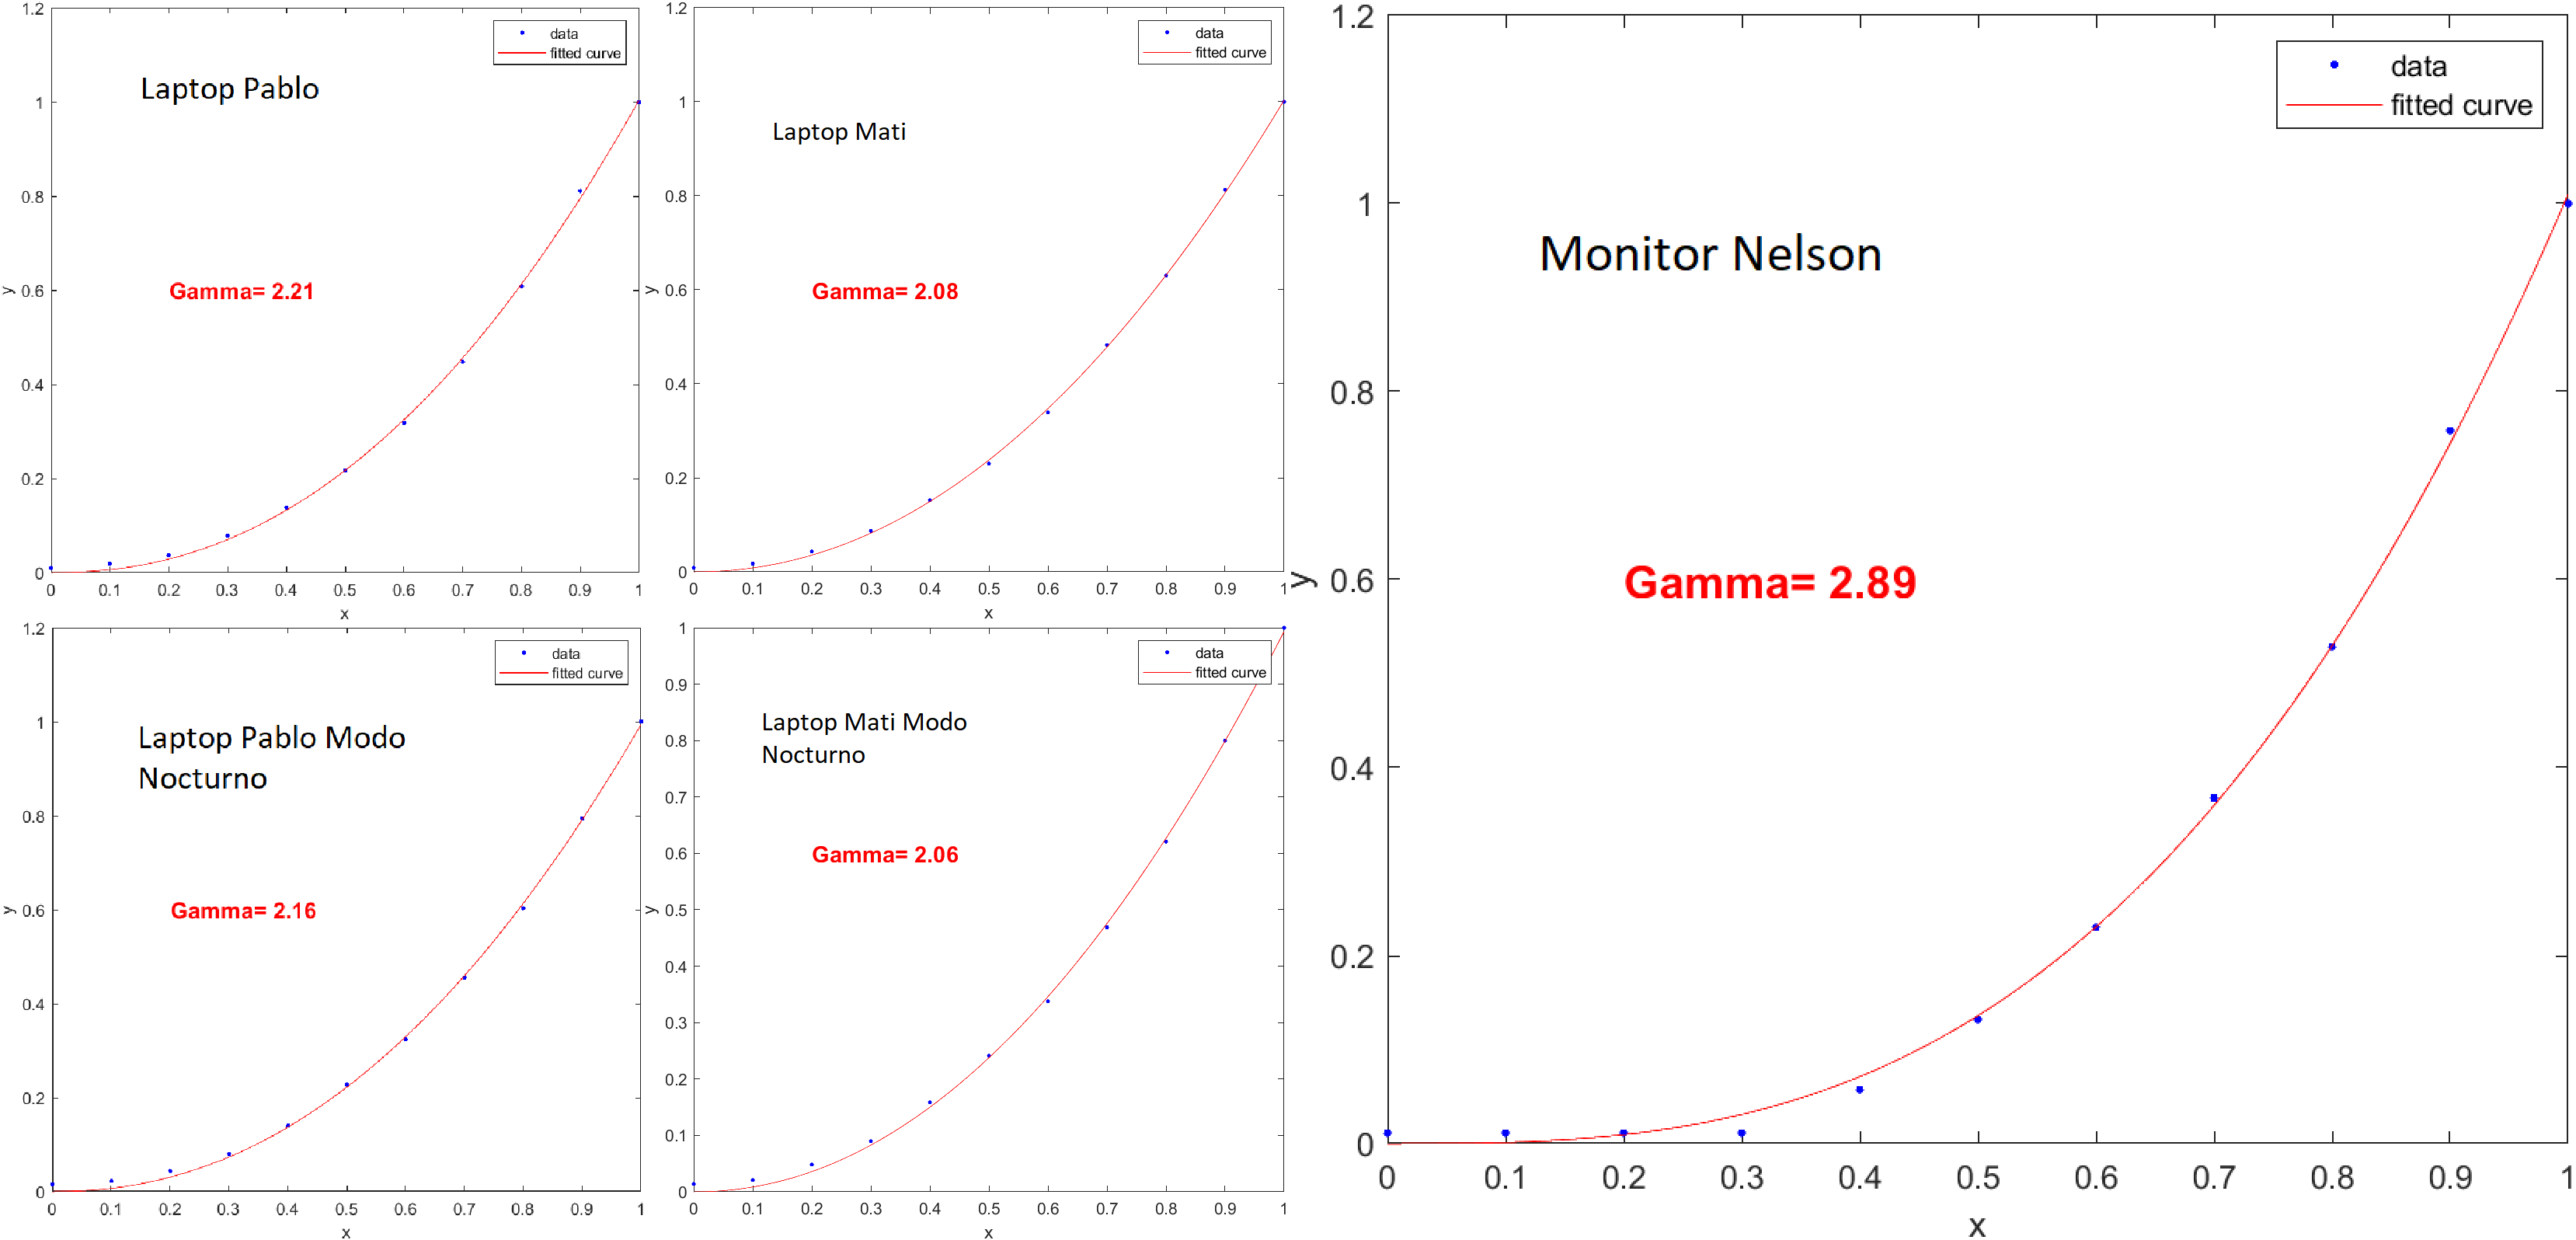

In [63]:
gamma_comparison = build_gamma_comparison()
w,h = gamma_comparison.size
displayImage(gamma_comparison, w, h)